<a href="https://colab.research.google.com/github/Jobby-John/Moringa-week-4/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2021_04_Chege_John_DataReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Let's import the Numpy library
import pandas as pd
# Let us import pandas library
import numpy as np

In [36]:
# let us load our Autolib dataset into our environment
# then we preview our first five entries to ensure the table has been loaded correctly
Autolib = pd.read_csv('Autolib.csv')
Autolib.head(2)


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24


In [39]:
# let us get some view of our dataset
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [38]:
# let us view the columns in our dataset
Autolib.columns


Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City',
       'Displayed comment', 'ID', 'Kind', 'Geo point', 'Postal code',
       'Public name', 'Rental status', 'Scheduled at', 'Slots', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [40]:
# we run the code below to view the dimensions of our code
# by this we mean we want to see how many columns and rows are in our dataset
Autolib.shape

(5000, 25)

In [41]:
#Lastly we can see the general statistics about our data
Autolib.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


DATA PREPARATION AND CLEANING 

VALIDITY 

In [ ]:
#we will start of by removing any column that is not useful in the project 
# as they won't help in the context of the problem that we are trying to solve 
Autolib.drop(['Cars', 'Charge Slots', 'Charging Status', 'Displayed comment', 'Geo point', 'Public name', 'Rental status', 'Scheduled at', 'Station type', 'Subscription status'], axis = 1, inplace = True)
Autolib.head(5)

In [ ]:
#Let us preview the first 5 rows the remaining columns in our data set
Autolib.head(5)


In [ ]:
#After dropping some of the columns we need to reset the index
#resetting index
Autolib.reset_index(drop=True)
Autolib.head(5)

In [ ]:
#Finally let us clear any white space in the columns data
#Using the str.strip function on the column name to strip any leading and trailing spaces  

Autolib.columns = Autolib.columns.str.strip()
Autolib

CHECKING FOR OUTLIERS

COMPLETENESS OF THE DATA

In [11]:
#we are going to check the existence of any null values 
#And drop them if any exists 
Autolib.isnull().values.any()


False

In [ ]:
CONSISTENCY OF THE DATA 


In [13]:
#We are going to check for the consistency of data
#By doing this we will be checking if there is any existence of duplicates in the data file
##And drop them if any exists 
Autolib.duplicated().values.any()

False

UNIFORMITY OF THE DATA 

In [ ]:
#Let us fix our column names and turn them to lower case
#Also remove the white space in between the names 
Autolib.columns = Autolib.columns.str.lower().str.replace(' ','_')
Autolib.head(2)

In [ ]:
#We can also rename the bluecar_counter to blue for easier identification
Autolib.rename(columns={'bluecar_counter':'blue', 'utilib_1.4_counter':'utilib_1.4'}, inplace=True)
Autolib.head(5)

ADDING THE DATETIME COLUMN

In [35]:
#We can combine the last four columns into one column to ease our work
Autolib['Datetime']= pd.to_datetime(Autolib[['year','month','day','hour','minute']])
Autolib.head(2)

,address,blue,utilib_counter,utilib_1.4,city,id,kind,postal_code,slots,status,year,month,day,hour,minute,Datetime,bluecar_use,utilib_use,utilib_1.4_usage
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43,2018-04-08 11:43:00,NaN,NaN,NaN
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24,2018-04-06 07:24:00,6.0,0.0,0.0


In [34]:
#After adding the datetime column we can drop the year, month, day, hour and minute colums from our dataset
Autolib.drop(columns=['year','month','day','hour','minute'])
Autolib.head(2)

,address,blue,utilib_counter,utilib_1.4,city,id,kind,postal_code,slots,status,year,month,day,hour,minute,Datetime,bluecar_use,utilib_use,utilib_1.4_usage
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43,2018-04-08 11:43:00,NaN,NaN,NaN
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24,2018-04-06 07:24:00,6.0,0.0,0.0


In [32]:
# let's add usage columns for our cars(bluecar, utilib & utili 1.4)
# And preview our dataframe to confirm changes
Autolib['bluecar_use'] = Autolib['blue'].diff()
Autolib['utilib_use'] = Autolib['utilib_counter'].diff()
Autolib['utilib_1.4_usage'] = Autolib['utilib_1.4'].diff()
Autolib.head(3)


,address,blue,utilib_counter,utilib_1.4,city,id,kind,postal_code,slots,status,year,month,day,hour,minute,Datetime,bluecar_use,utilib_use,utilib_1.4_usage
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43,2018-04-08 11:43:00,NaN,NaN,NaN
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24,2018-04-06 07:24:00,6.0,0.0,0.0
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,1,ok,2018,4,3,20,14,2018-04-03 20:14:00,-3.0,0.0,2.0


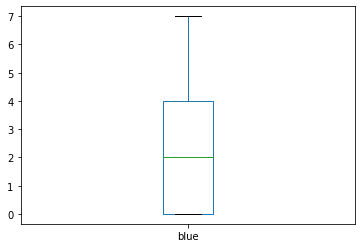

In [31]:
# Let's plot a box plot to visualize any outliers in our blue column
import matplotlib.pyplot as plt 
% matplotlib inline 
import seaborn as sns
Autolib.boxplot(column =['blue'], grid = False) 

#there are no outliers in our bluecar counter column

FINALLY LET US CHECK FOR ANY INCONSISTENCIES

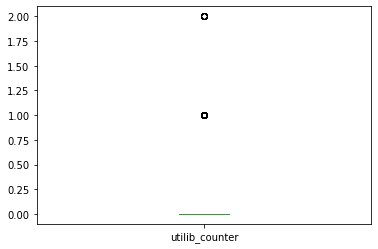

In [30]:
# Let's plot a box plot to visualize any outliers in our utilib_counter column
Autolib.boxplot(column =['utilib_counter'], grid = False) 



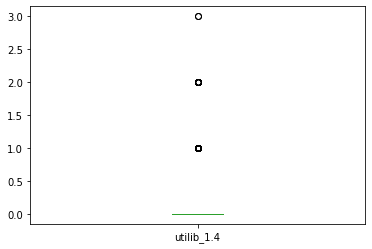

In [29]:
# Let's plot a box plot to visualize any outliers in our utilib_counter column
Autolib.boxplot(column =['utilib_1.4'], grid = False)

LASTLY LET US EXPORT THE CLEANED DATA FOR ANALYSIS

In [23]:
Autolib.to_csv('Autolib_1')

ANALYSIS PART

In [26]:


# Since we research question is focused on the city of Paris, 
# Let us filter our dataframe to show only data related to Paris
Autolib_1 = pd.read_csv('Autolib_1')
Autolib_1.head(2)



,Unnamed: 0,address,blue,utilib_counter,utilib_1.4,city,id,kind,postal_code,slots,status,year,month,day,hour,minute,Datetime,bluecar_use,utilib_use,utilib_1.4_usage
0,0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43,2018-04-08 11:43:00,NaN,NaN,NaN
1,1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24,2018-04-06 07:24:00,6.0,0.0,0.0


In [28]:
# Since we research question is focused on the city of Paris, 
# Let us filter our dataframe to show only data related to Paris
Autolib_1 = pd.read_csv('Autolib_1')
paris = np.where(Autolib_1['city']=='Paris')
paris
paris1 = Autolib_1.loc[paris]
paris1.head(2)

,Unnamed: 0,address,blue,utilib_counter,utilib_1.4,city,id,kind,postal_code,slots,status,year,month,day,hour,minute,Datetime,bluecar_use,utilib_use,utilib_1.4_usage
0,0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43,2018-04-08 11:43:00,NaN,NaN,NaN
1,1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24,2018-04-06 07:24:00,6.0,0.0,0.0


Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

In [ ]:
# The code below will output the most popular hour for picking up a bluecar in Paris
paris1[paris1['bluecar_use'] < 0].groupby('hour')['hour'].count().sort_values(ascending= False).head(1)

hour
21    80
Name: hour, dtype: int64

What is the most popular hour for returning a bluecar?

In [ ]:
paris1[paris1['bluecar_use'] > 0].groupby('hour')['hour'].count().sort_values(ascending= False).head(1)

hour
3    49
Name: hour, dtype: int64


What station is the most popular?

    Overall?
    At the most popular picking hour?



In [ ]:
# The code below will output the most popular station overall
paris1[(paris1['status']=='ok') & (paris1['kind']=='STATION')].groupby('id')['id'].count().sort_values(ascending= False).head(1)

id
paris-portedemontrouge-8    13
Name: id, dtype: int64

In [ ]:
# The code below will output the most popular station at the most popular picking hour
paris1[(paris1['status']=='ok') & (paris1['kind']=='STATION') & (paris1['hour'] == 21)].groupby('id')['id'].count().sort_values(ascending= False).head(1)

id
paris-tronchet-19    4
Name: id, dtype: int64


What postal code is the most popular for picking up Blue cars?

    Overall?
    At the most popular picking hour?

Does the most popular station belong to that postal code?


In [ ]:
# The code below will output the most popular postal code overall
paris1[(paris1['status']=='ok') & (paris1['kind']=='STATION')].groupby('postal_code')['postal_code'].count().sort_values(ascending= False).head(1)

postal_code
75015    220
Name: postal_code, dtype: int64

In [ ]:
# The code below will output the most popular postal code at the most popular picking hour
paris1[(paris1['status']=='ok') & (paris1['kind']=='STATION') & (paris1['hour'] == 21)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False).head(1)

postal_code
75014    15
Name: postal_code, dtype: int64